# Autosuggestion Collection
This function handles the core process of collecting autosuggestion data from Google or Bing.

In [1]:
import requests
import urllib

# ----------------------------------------------------------------------------------------------------------------
# collect_autosuggestions
#
# parameters:
# "source" is either "google" or "bing"
# "tld" stands for "top level domain" and can be any of the 2-letter country codes listed here where google operates: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2
# "lang" is the language of the suggestions returned, should be two letter codes from here: https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes
# "query" is the query that you would like to see autocompleted
# ----------------------------------------------------------------------------------------------------------------

def collect_autosuggestions(source, tld, lang, query):
    if source == "google":
        # Some info on this api: http://shreyaschand.com/blog/2013/01/03/google-autocomplete-api/
        url = 'http://www.google.'+tld+'/complete/search?&client=firefox&%s' % (urllib.urlencode({'q': query.encode('utf-8'), 'hl': lang}))
       
    elif source == "bing":
        # Note: for Bing the language is controlled by the tld, so the lang parameter will have no effect on its own
        url = 'http://api.bing.com/osjson.aspx?%s' % (urllib.urlencode({'query': query.encode('utf-8'), 'cc': tld}))
   
    r = requests.get(url)
    suggestions = r.json()[1]
    return suggestions

In [2]:
import requests
import json
import pandas as pd

members_text = requests.get("https://www.govtrack.us/api/v2/role?current=true&limit=800")
members_data = json.loads(members_text.text) # First 100 for now
members = members_data['objects']
print members

[{u'senator_rank': u'junior', u'extra': {u'rss_url': u'http://www.blunt.senate.gov/public/?a=rss.feed', u'fax': u'202-224-8149', u'contact_form': u'http://www.blunt.senate.gov/public/index.cfm/contact-form?p=contact-roy', u'office': u'260 Russell Senate Office Building', u'address': u'260 Russell Senate Office Building Washington DC 20510'}, u'congress_numbers': [112, 113, 114], u'id': 268, u'startdate': u'2011-01-05', u'senator_class_label': u'Class 3', u'district': None, u'title': u'Sen.', u'title_long': u'Senator', u'current': True, u'state': u'MO', u'party': u'Republican', u'leadership_title': None, u'website': u'http://www.blunt.senate.gov', u'description': u'Junior Senator from Missouri', u'phone': u'202-224-5721', u'role_type': u'senator', u'role_type_label': u'Senator', u'enddate': u'2017-01-03', u'senator_rank_label': u'Junior', u'person': {u'name': u'Sen. Roy Blunt [R-MO]', u'firstname': u'Roy', u'twitterid': u'RoyBlunt', u'middlename': u'', u'gender': u'male', u'bioguideid':

In [3]:
len(members)

542

In [4]:
# import string
# Making lists of name, gender, and auto_suggestion in govtrack.us

name = []
auto_suggestion = []
gender = []

for member in members:
    name.append(member['person']['firstname'])
    gender.append(member['person']['gender'])
    suggestions = collect_autosuggestions("google", "com", "en", member['person']['firstname'] + ' ' + member['person']['lastname'])
    auto_suggestion.append(suggestions)

In [7]:
# creating two lists from a source list: male rep & female rep

dict_total = {"name": name, "gender": gender, "suggestion": auto_suggestion}
df = pd.DataFrame(dict_total)
df_male = df[df["gender"]=="male"]
df_female = df[df["gender"]=="female"]

,gender,name,suggestion
0,male,Roy,"[roy blunt, roy blunt committees, roy blount j..."
1,male,John,"[john boozman, john boozman for senate, john b..."
2,male,Richard,"[richard burr, richard burr for senate, richar..."
3,male,John,"[john isakson, john isakson preferred apartmen..."
4,male,Mark,"[mark kirk, mark kirk senate, mark kirk twitte..."
5,male,Jerry,"[jerry moran, jerry moran committees, jerry mo..."
6,male,Robert,"[robert portman, robert portman ohio, rob port..."
7,male,Patrick,"[patrick toomey, patrick toomey aclu, patrick ..."
8,male,David,"[david vitter, david vitter senate, david vitt..."
9,female,Barbara,"[barbara boxer, barbara boxer staff, barbara b..."


In [ ]:
# making text with male rep only table (df_male)

text_list = []

for i in df_male['suggestion']:
    text_list.append([e.split(' ', 2)[2:] for e in i])

text = str()
temp_list = []

for i in text_list:
    for k in i:
        temp_list.extend(k)

for i in range(len(temp_list)):
    text += temp_list[i] + " "

import unicodedata

text = unicodedata.normalize('NFKD', text).encode('ascii','ignore')
type(text)

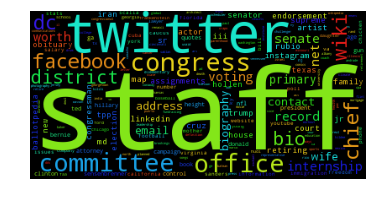

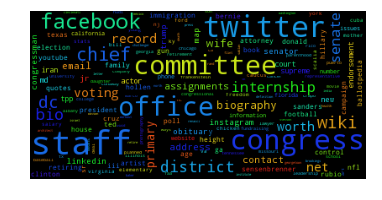

In [20]:
# Making wordcloud of auto suggestions for male rep

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:

%matplotlib inline

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)

In [ ]:
# Repeat the same process for female rep

text_list2 = []

for i in df_female['suggestion']:
    text_list2.append([e.split(' ', 2)[2:] for e in i])

text2 = str()
temp_list = []

for i in text_list:
    for k in i:
        temp_list.extend(k)

for i in range(len(temp_list)):
    text2 += temp_list[i] + " "

import unicodedata

text2 = unicodedata.normalize('NFKD', text2).encode('ascii','ignore')

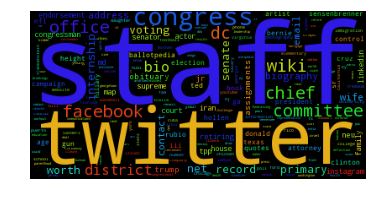

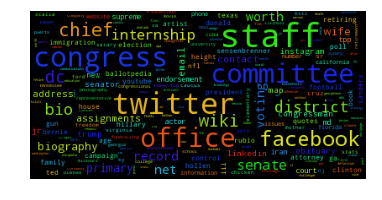

In [24]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:

%matplotlib inline

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)